In [2]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables, 
Brillouin, PyCall, Statistics
np = pyimport("numpy")
using HDF5; 
include("symeigs/corner_charges.jl")
include("plotting_supercells.jl") # Utilities for plotting bulk crystal and cladding
include("plotting_utilities.jl")
include("symeigs/wyckoffs_dict.jl");
cm = 1/2.54;

In [2]:
# First we compare the sobol vs the random results

In [19]:
sobol_corner_te = Float64[]
random_corner_te = Float64[]
sobol_corner_tm = Float64[]
random_corner_tm = Float64[]

for sg in [2, 10, 16]
    loaded_data_sobol = load("sobol_symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    loaded_data_random = load("symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    
    push!(sobol_corner_tm, [sum(x) for x in (sum([loaded_data_sobol[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...)
    push!(sobol_corner_te, [sum(x) for x in (sum([loaded_data_sobol[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...)
    push!(random_corner_tm, [sum(x) for x in (sum([loaded_data_random[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...)
    push!(random_corner_te, [sum(x) for x in (sum([loaded_data_random[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...)

end

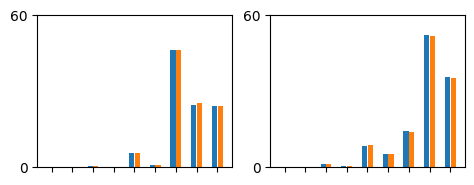

In [27]:
figure(figsize=(14*cm, 5*cm))

bar_width = 0.5
spacing = 2
sobol_min =  round(1.5 - bar_width/2-0.025, digits=3)
sobol_max =  round(1.5+8*spacing - bar_width/2-0.025, digits=3)

random_min = round(1.5 + bar_width/2+0.025, digits=3)
random_max = round(1.5+8*spacing + bar_width/2+0.025, digits=3)

subplot(1, 2, 1)
bar(sobol_min:spacing:sobol_max, abs.(sobol_corner_tm ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_corner_tm ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
ylim(0, 60)
yticks([0, 60])

subplot(1, 2, 2)
bar(sobol_min:spacing:sobol_max, abs.(sobol_corner_te ./ 100), width=bar_width)
bar(random_min:spacing:random_max, abs.(random_corner_te ./ 100), width=bar_width)
xticks(1.5:spacing:(1.5+8*spacing), ["", "","", "", "", "","", "", ""])
yticks([0, 60])

ylim(0, 60)
savefig("SobolvRandomCorner.pdf")


In [36]:
sobol_corner_tm

9-element Vector{Float64}:
    0.0
    0.0
   10.75
    0.0
  521.5
   63.5
 4618.0
 2448.0
 2406.0

In [2]:
# We analyze c6 symmetry

In [12]:
sg = 16; id_eps=3; mode="te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [13]:
clad_dispersion = dispersionsv[275]
bulk_dispersion = dispersionsv[8080];
clad_summaries = cumsummariesv[275]
bulk_summaries = cumsummariesv[8080];

In [22]:
brs = bandreps(16, 2);
brs_labs = ["(" * br.wyckpos * "|"  * prod(string.(collect(br.label)[1:end-2])) * ")" for br in brs]

n_bulk = cumsummariesv[8080][3].n;
n_clad = cumsummariesv[275][1].n;
bulk_ebr_decomposition = decompose(n_bulk, brs)
clad_ebr_decomposition = decompose(n_clad, brs);


println("Bulk crystal EBR decomposition is: ", Crystalline.symvec2string(bulk_ebr_decomposition, brs_labs))
println("Clad crystal EBR decomposition is: ", Crystalline.symvec2string(clad_ebr_decomposition, brs_labs))

Bulk crystal EBR decomposition is: [(2b|A)+(1a|A)+(1a|E₂)]
Clad crystal EBR decomposition is: [(1a|A)]


In [7]:
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg13/eps3/te/dim2-sg13-23510-res64-te-dispersion.out", ',')[:, 2:4])]
gamma_idx = findall(x -> isapprox(x, [0.3333, 0.333, 0], atol=1e-3), kpoints);

In [4]:
bands_c6 = readdlm("./corner_charge_supercells/output/dim2-sg16-28080-res16-te-supercell-corner-dispersion-1.out", ',')[:, 6:end];

In [29]:
bands_c6 = readdlm("./corner_charge_supercells/output/dim2-sg16-28080-res16-te-supercell-corner-dispersion.out", ',')[:, 6:end];

In [30]:
bands_c6

1×1024 Matrix{Float64}:
 0.0  0.0399187  0.0399883  0.040116  …  0.763161  0.76327  0.763425

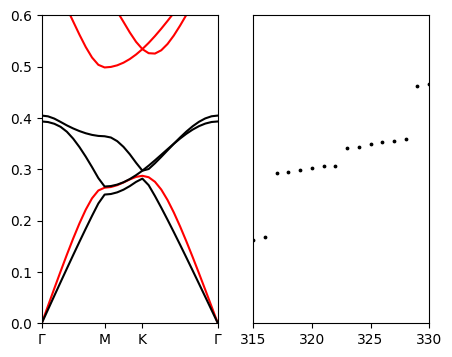

(Any[], Any[])

In [34]:
figure(figsize=(5, 4))
subplot(1, 2, 1)
plot(clad_dispersion, color="red")
plot(bulk_dispersion, color="black")
xticks([0, 10, 16, 28], ["Γ", "M", "K", "Γ"])
ylim(0, 0.6)
xlim(0, 28)
subplot(1, 2, 2)
scatter(1:1024, bands_c6, s=3, color="black")
#scatter(317:322, bands_c6[317:322],color="red", s=5)

xlim(315, 330)
ylim(0.35, 0.5)
yticks([])

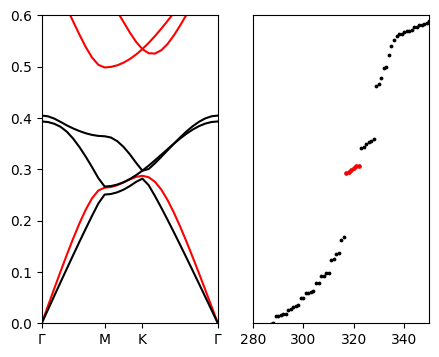

(Any[], Any[])

In [9]:
figure(figsize=(5, 4))
subplot(1, 2, 1)
plot(clad_dispersion, color="red")
plot(bulk_dispersion, color="black")
xticks([0, 10, 16, 28], ["Γ", "M", "K", "Γ"])
ylim(0, 0.6)
xlim(0, 28)
subplot(1, 2, 2)
scatter(1:1024, bands_c6, s=3, color="black")
scatter(317:322, bands_c6[317:322],color="red", s=5)

xlim(280, 350)
ylim(0.35, 0.5)
yticks([])

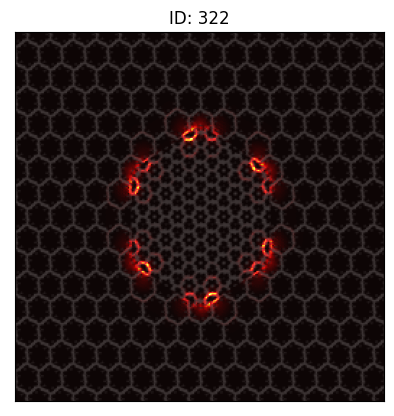

(Any[], Any[])

In [7]:
figure()
epsilon = h5open("./corner_charge_supercells/output/sg16/dim2-sg16-28080-res16-te-corner-epsilon.h5", "r") do fid
    read(fid, "data")
end;
epsilon_new = h5open("./corner_charge_supercells/output/sg16/dim2-sg16-28080-res16-te-corner-epsilon.h5", "r") do fid
    read(fid, "data-new")
end;

imshow(epsilon_new, alpha=0.9, cmap="gray")
pwrs = Matrix{Float64}[]
pwrs_new = Matrix{Float64}[]
hzs_new = Matrix{ComplexF64}[]

for i in 317:322
    title("ID: $i")
    dir = "./corner_charge_supercells/output/sg16/"
    pwr_new = h5open(dir*"dim2-sg16-28080-res16-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data-new")
    end
    
    pwr = h5open(dir*"dim2-sg16-28080-res16-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data")
    end
    
    hz_new = h5open(dir*"/dim2-sg16-28080-res16-te-corner-h.k01.b$i.z.te.h5", "r") do fid
        read(fid, "z.r-new")+ 1im*read(fid, "z.i-new")
        #read(fid, "z.r")+ 1im*read(fid, "z.i")
    end
    
    push!(pwrs, pwr)
    push!(pwrs_new, pwr_new)
    push!(hzs_new, hz_new)
end
#imshow(real.(sum(hzs_new)), cmap="jet", alpha=0.8, vmin=-1, vmax=1)
#imshow(sum(([(abs.(h)).^2 for h in hzs_new])), cmap="hot", vmax=2)#, vmin=0, vmax=0.8)
imshow(sum(pwrs_new), cmap="hot", alpha=0.8)
gca().set_aspect("equal", adjustable="box")

xticks([])
yticks([])

In [3]:
θ = π/3
rotθ = [cos(θ) -sin(θ);sin(θ) cos(θ)]

2×2 Matrix{Float64}:
 0.5       -0.866025
 0.866025   0.5

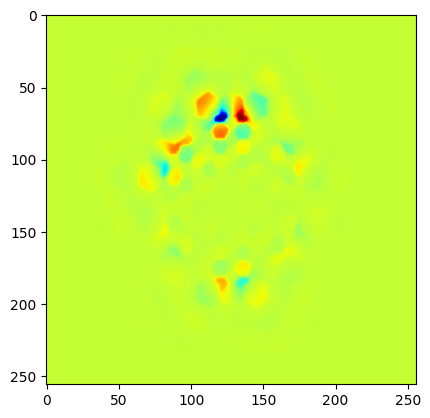

PyObject <matplotlib.image.AxesImage object at 0x7fb789a3ffd0>

In [8]:
imshow(real.(hzs_new[1]), cmap="jet")

In [37]:
symmetric_hz = zeros(256, 256)
for i in 50:200
    for j in 50:200
        for n in 0:5
            x = i-128
            y = j-128
            rotx, roty = (rotθ^n)*[x, y]
            #println(rotx, " ", roty)
            symmetric_hz[i, j] +=
           # try ((-1)^n)*real.(sum(hzs_new))[Int(round(rotx+128)), Int(round(roty+128))]
            try real.((-1)^n*cis(2π*n/6)*sum(hzs_new))[Int(round(rotx+128)), Int(round(roty+128))]

            catch e
                println(e)
            end
        end
    end
end

In [27]:
Crystalline.TEST_αβγ

3-element Vector{Float64}:
 0.123123123
 0.456456456
 0.789789789

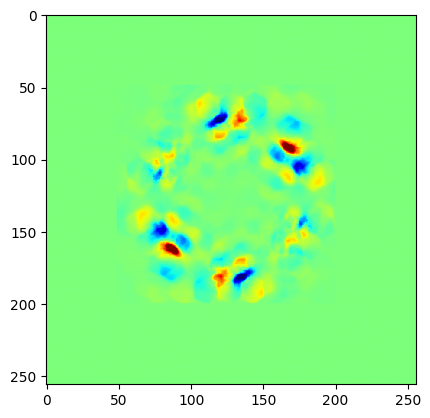

PyObject <matplotlib.image.AxesImage object at 0x7fb7868eba60>

In [38]:
imshow(symmetric_hz, cmap="jet", vmin=-3, vmax=3)

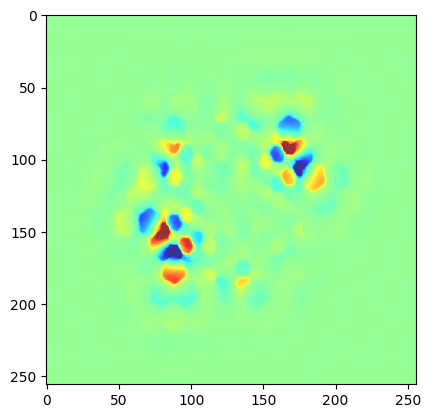

PyObject <matplotlib.image.AxesImage object at 0x7f2f5660d610>

In [120]:
imshow(real.(hzs_new[1]*1im*hzs_new[2]-hzs_new[3]+hzs_new[4]-hzs_new[5]+hzs_new[6]), cmap="jet", alpha=0.8, vmin=-1, vmax=1)


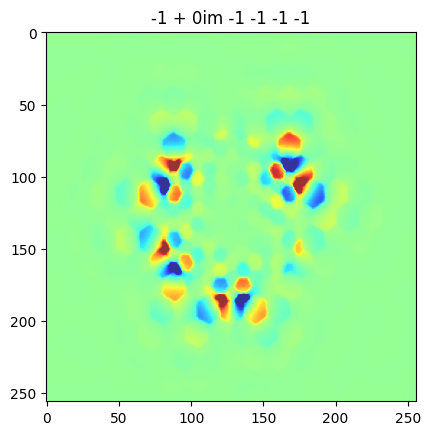

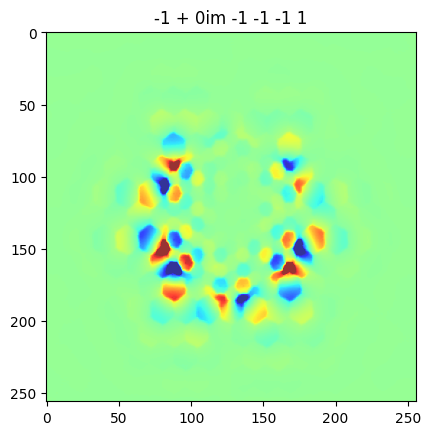

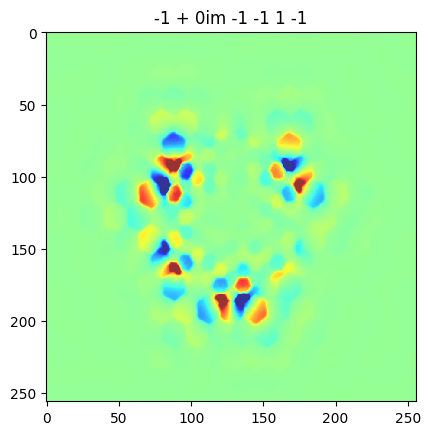

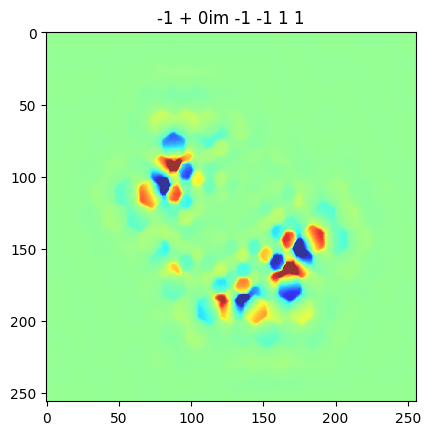

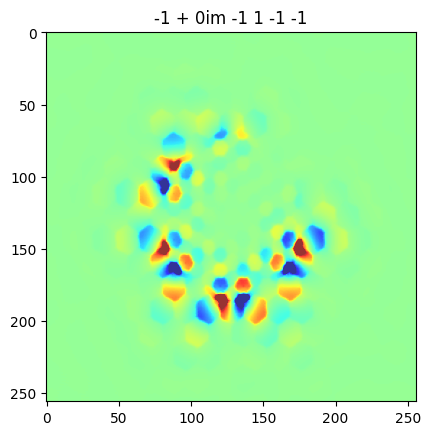

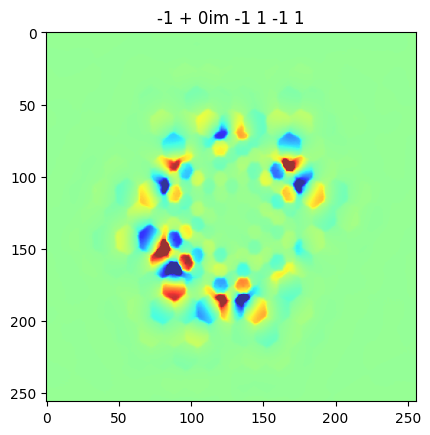

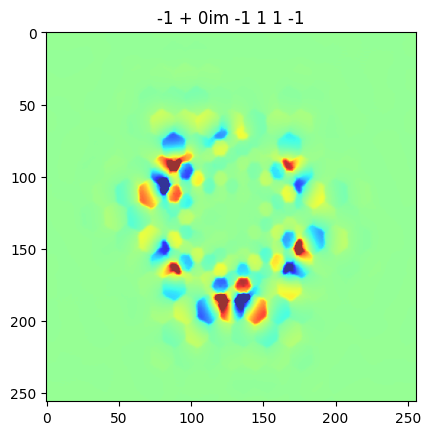

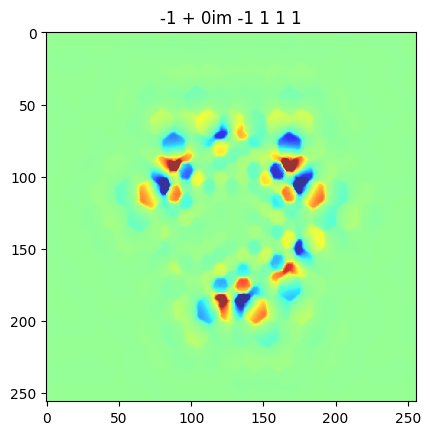

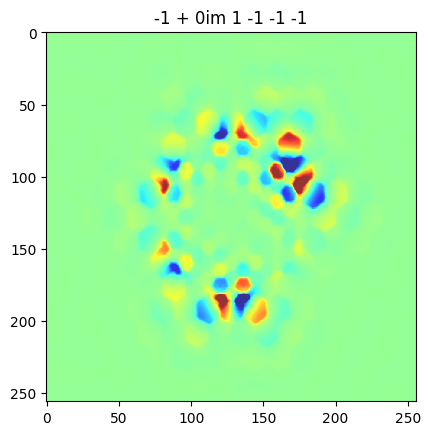

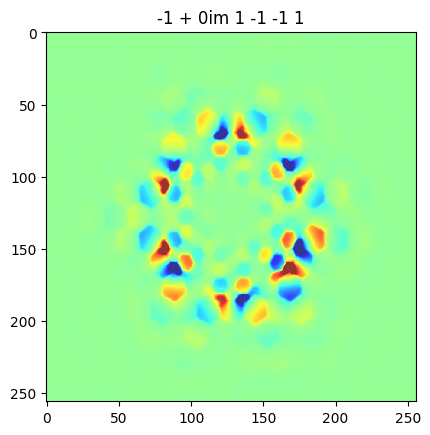

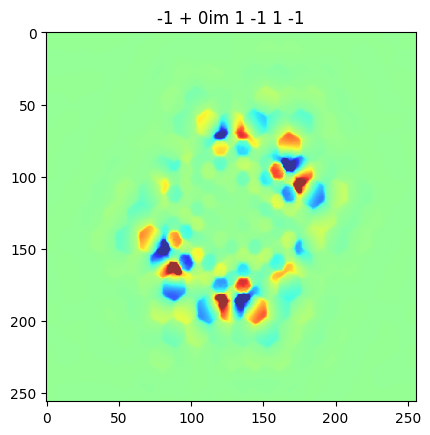

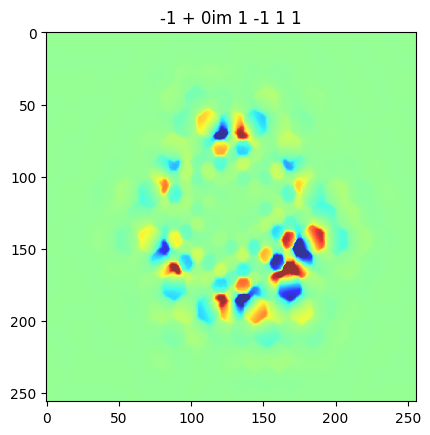

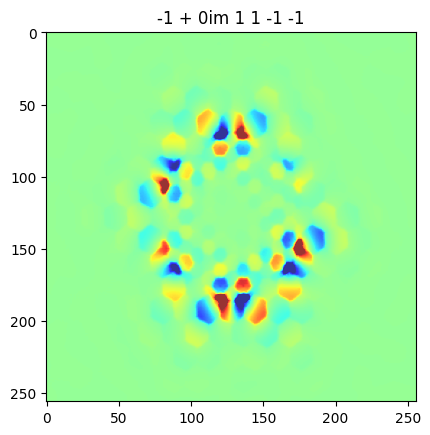

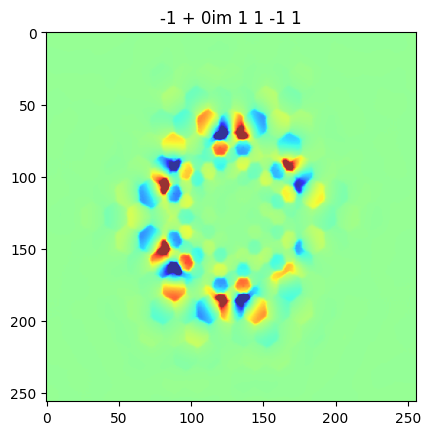

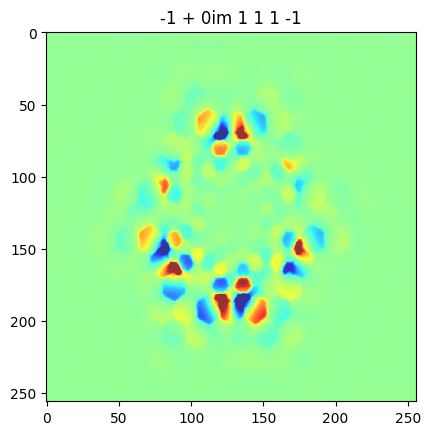

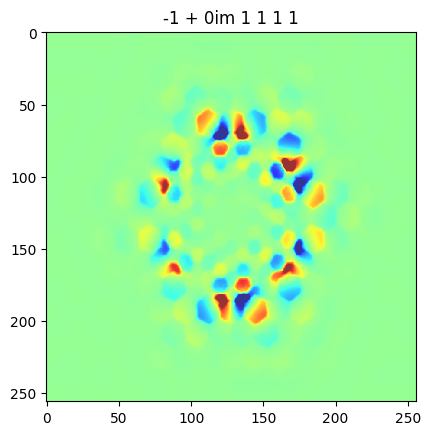

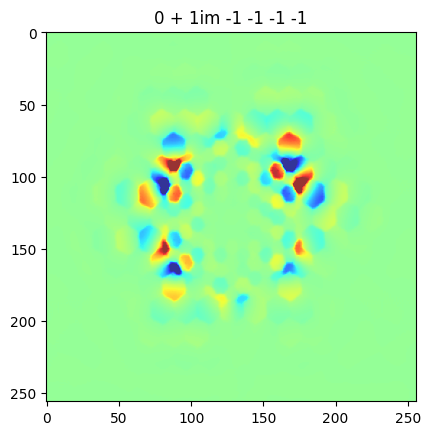

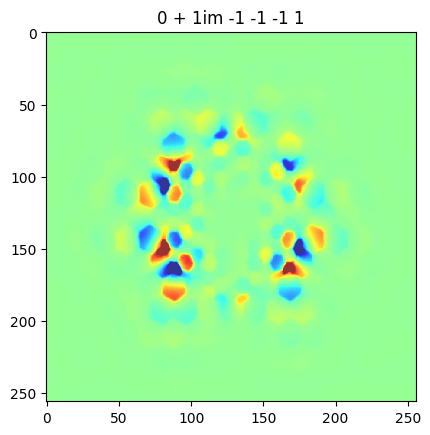

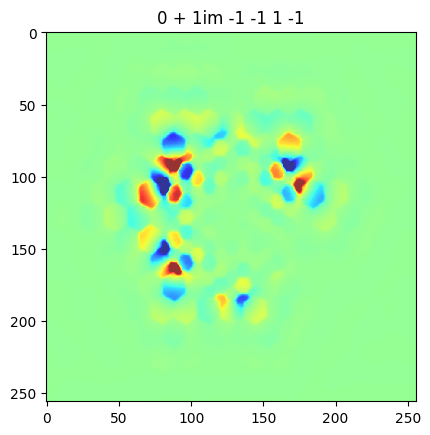

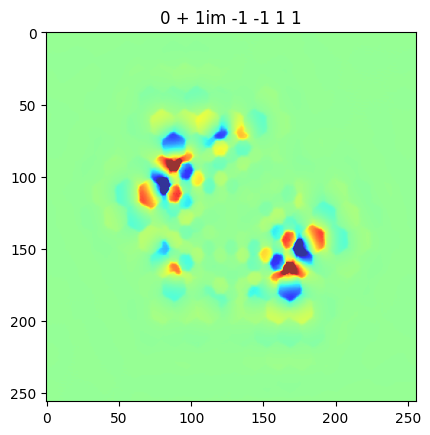

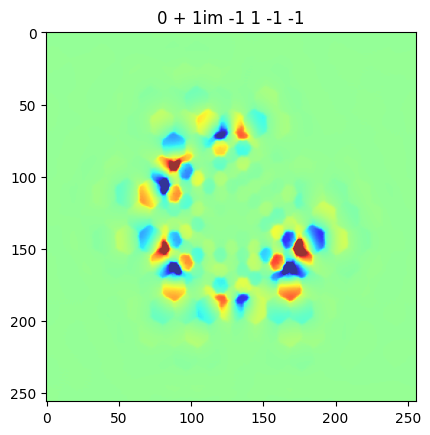

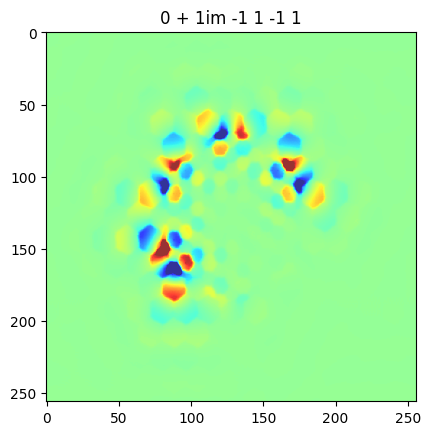

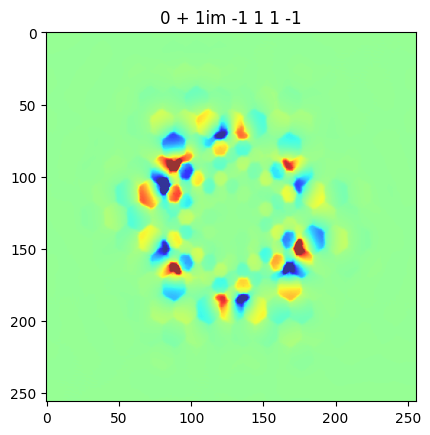

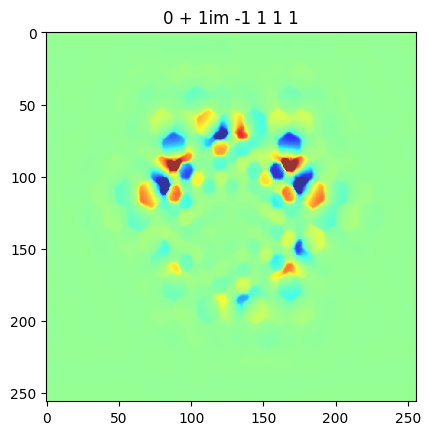

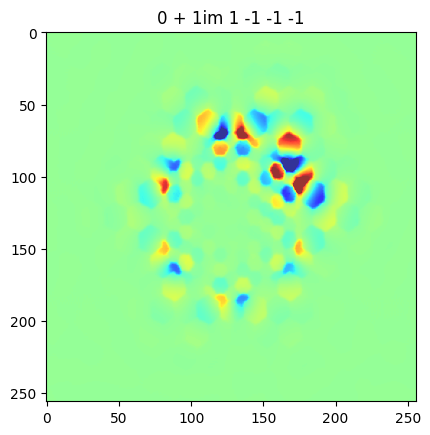

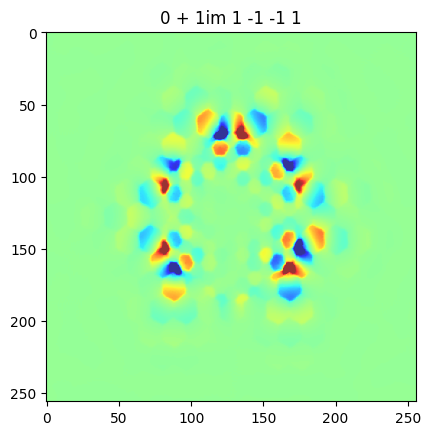

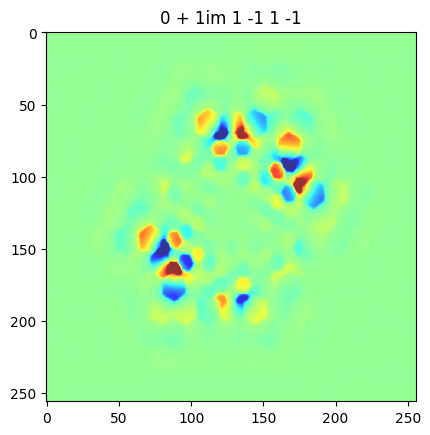

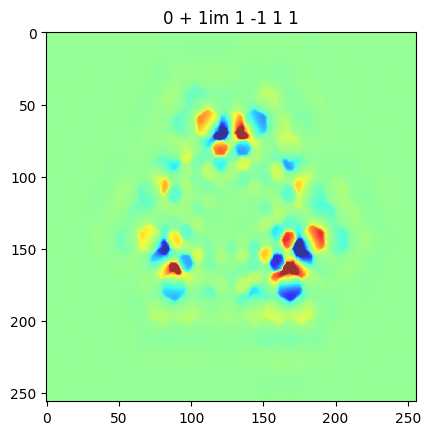

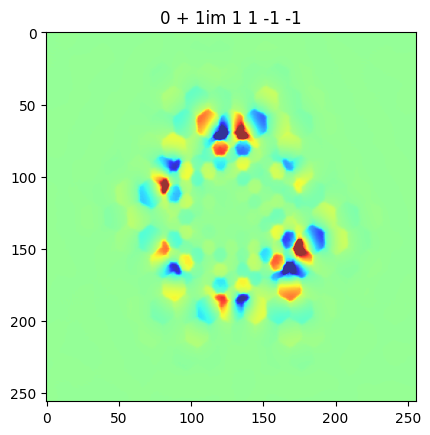

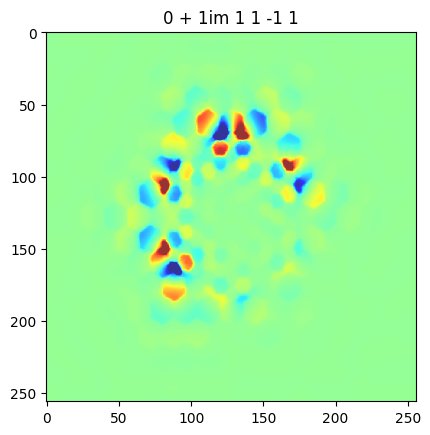

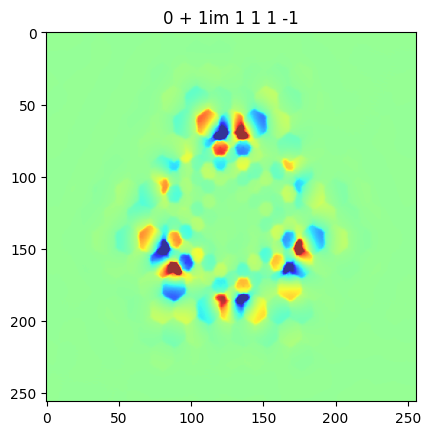

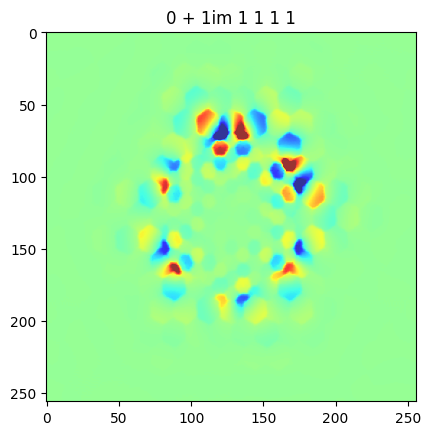

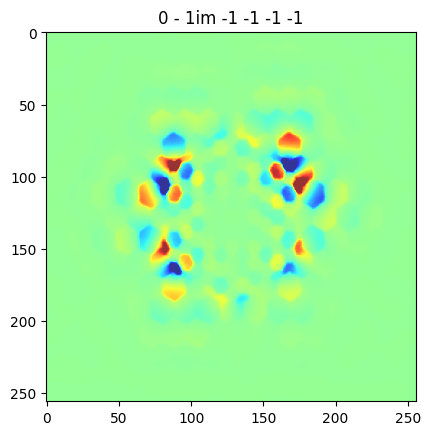

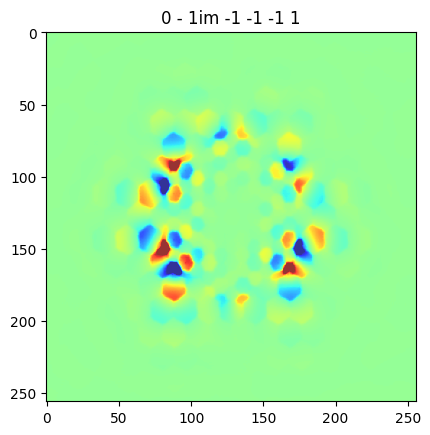

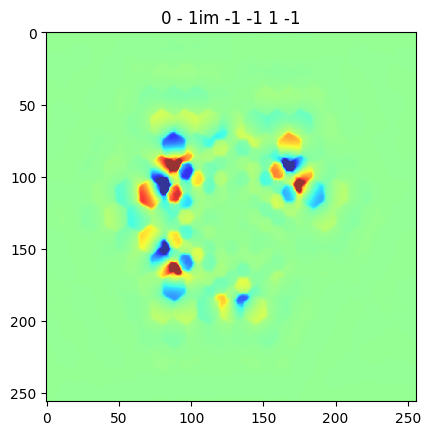

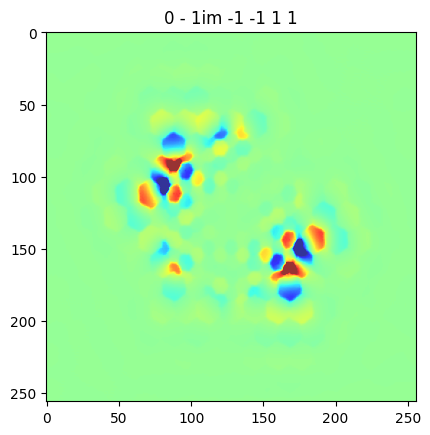

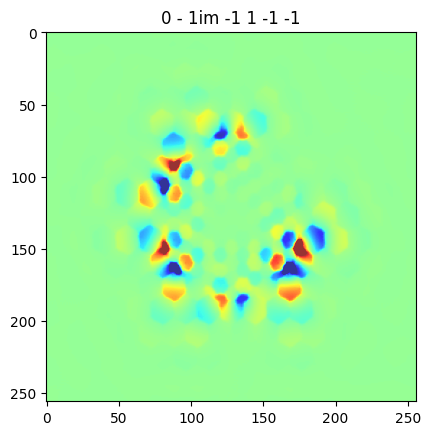

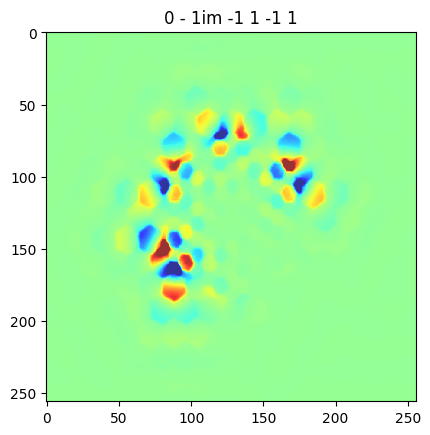

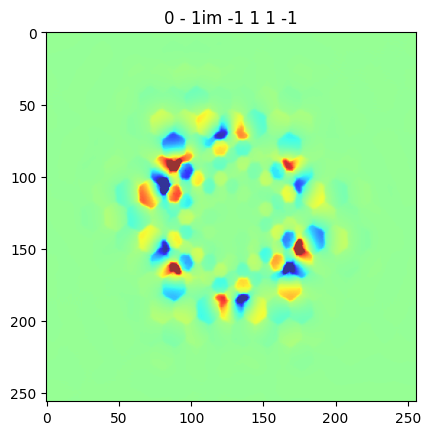

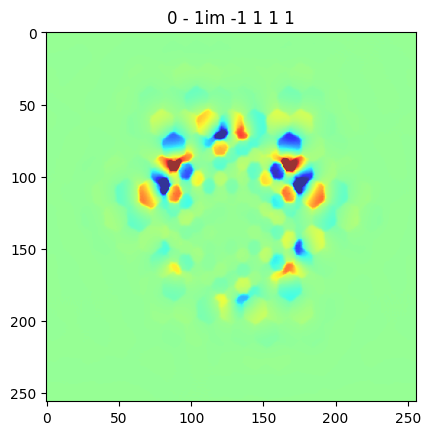

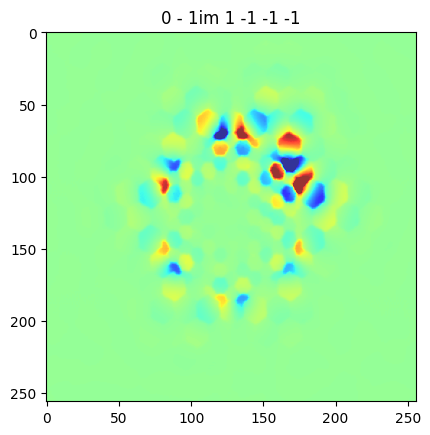

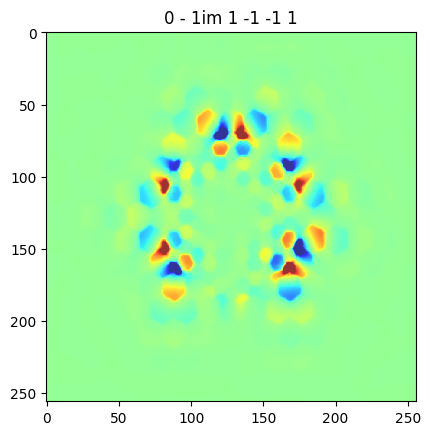

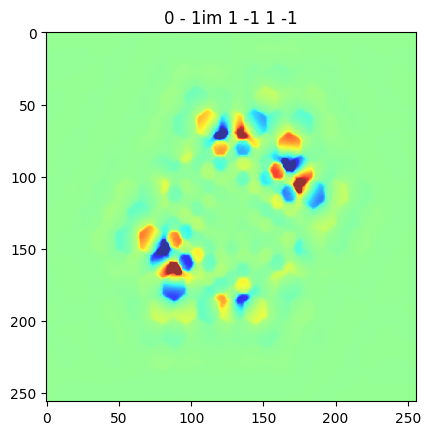

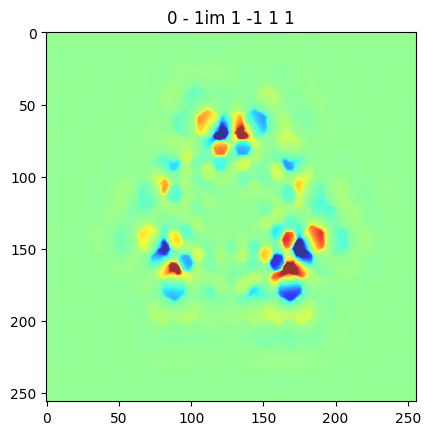

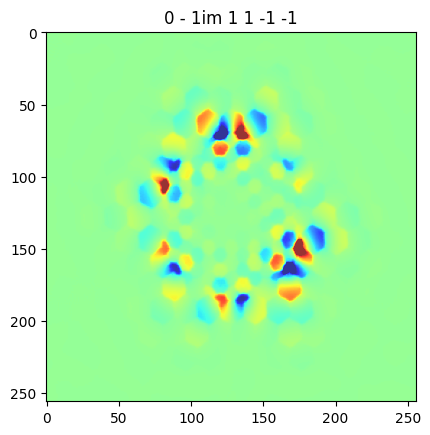

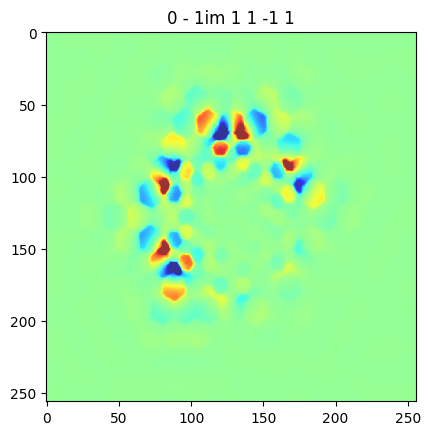

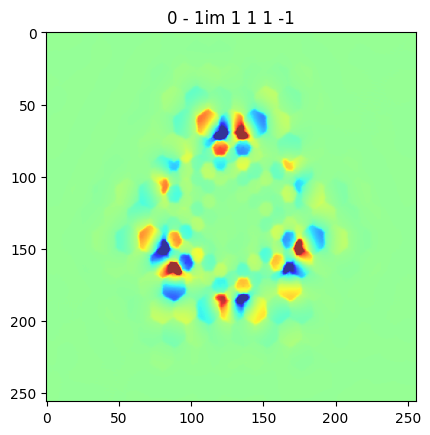

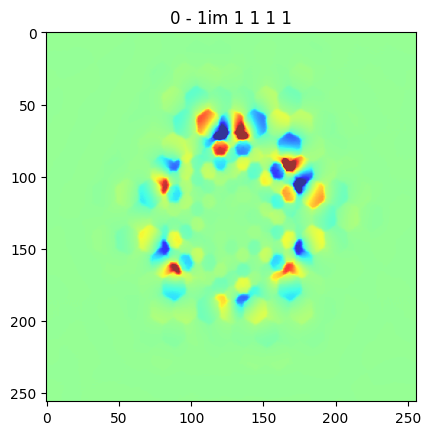

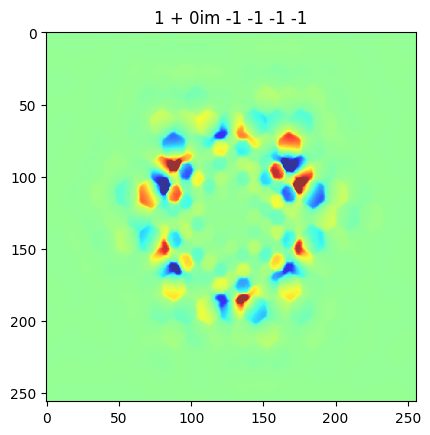

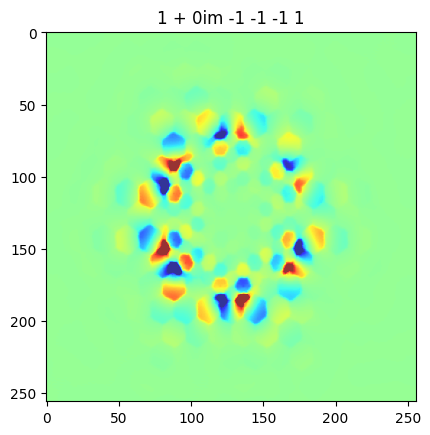

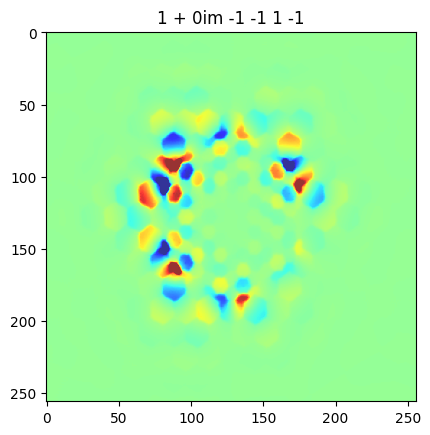

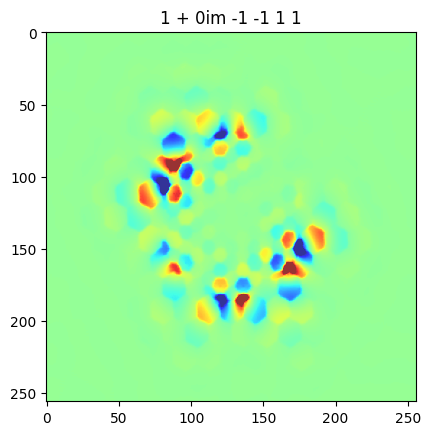

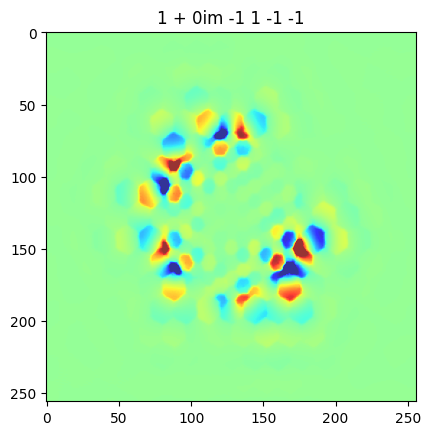

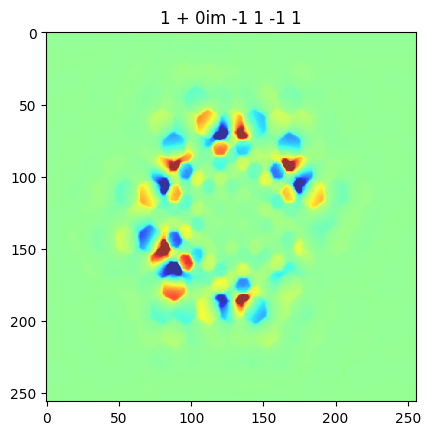

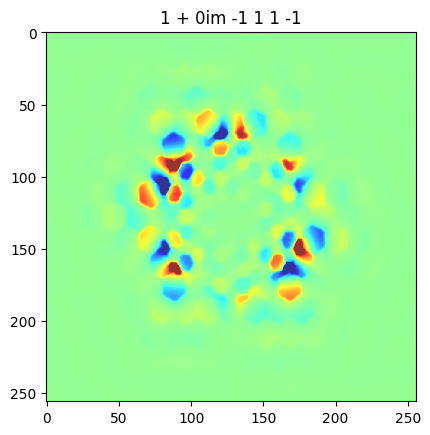

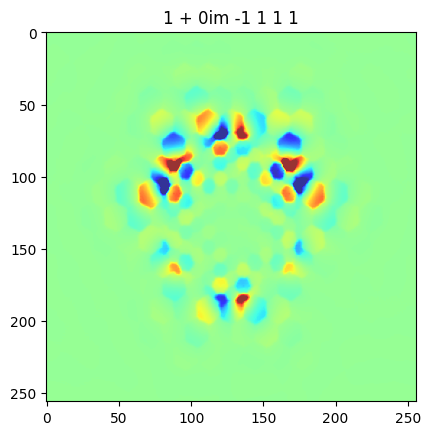

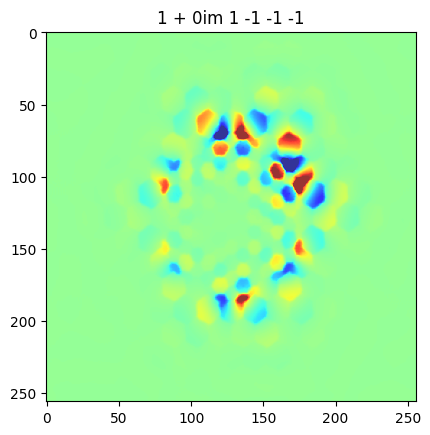

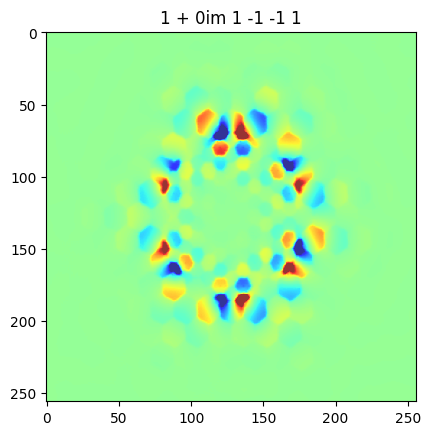

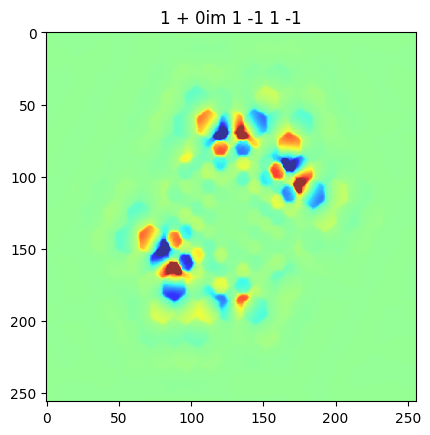

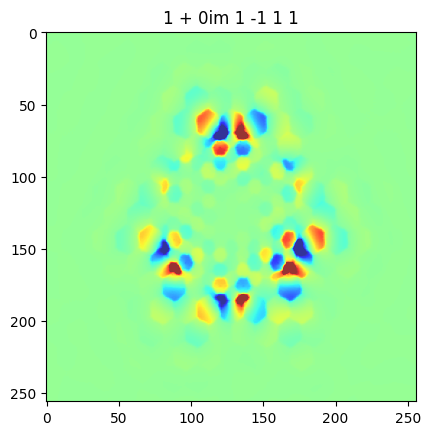

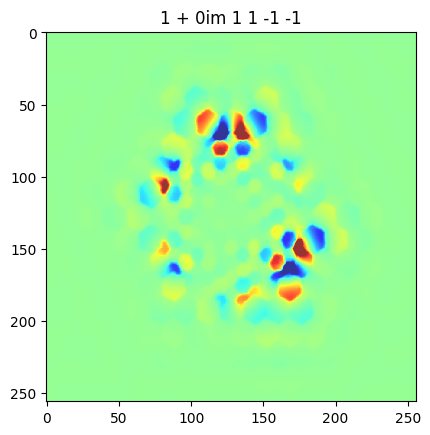

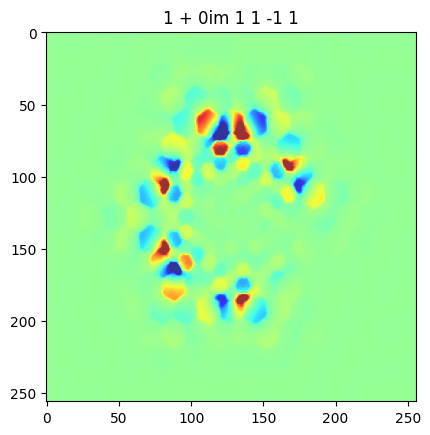

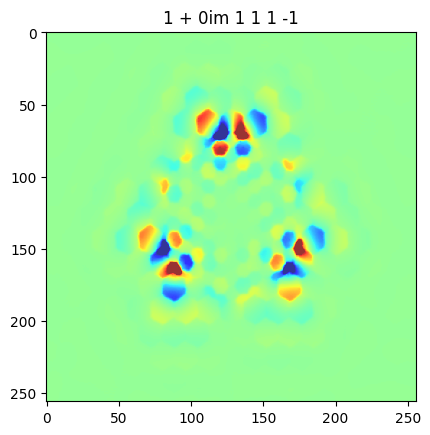

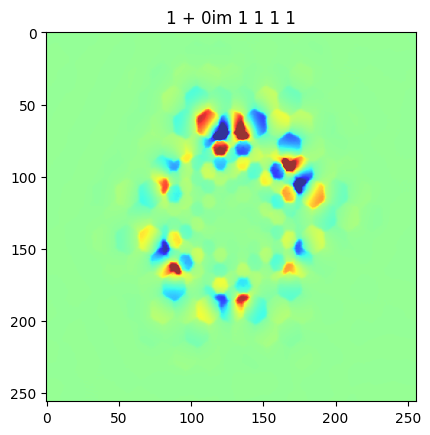

In [125]:
for i in [-1, 1im, -1im, 1]
    for j in [-1,1]
        for k in [-1,1]
            for l in [-1,1]
                for m in [-1,1]
                    figure()
                    title("$i $j $k $l $m"); flush(stdout)
                    imshow(real.(hzs_new[1]+i*hzs_new[2]+j*hzs_new[3]+k*hzs_new[4]+l*hzs_new[5]+m*hzs_new[6]), cmap="jet", alpha=0.8, vmin=-1, vmax=1)
                end
            end
        end
    end
end

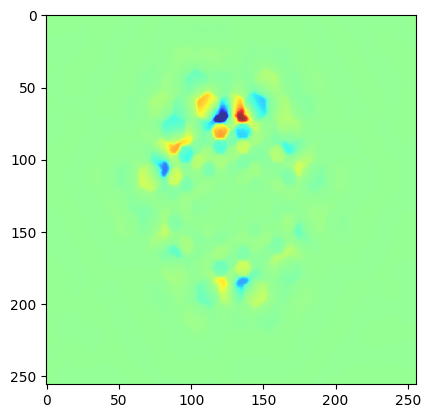

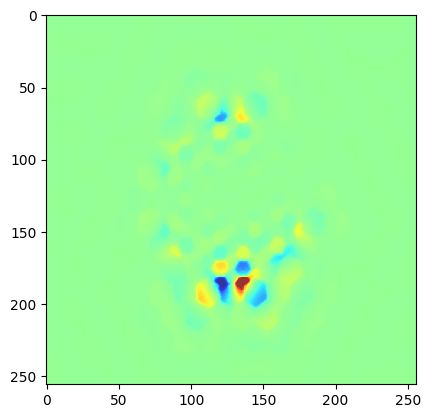

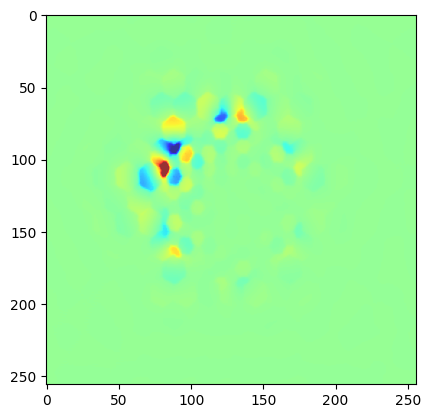

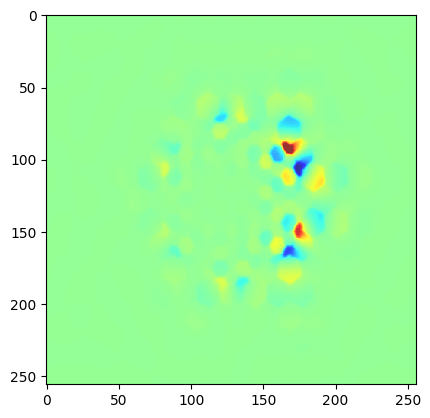

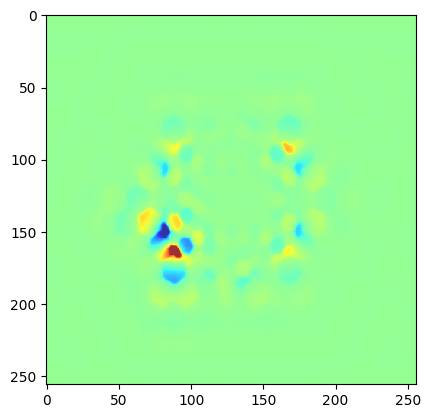

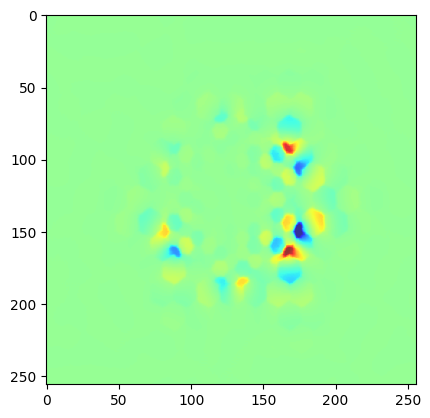

In [65]:
for i in 1:6
    figure()
    imshow(real.(hzs_new[i]), cmap="jet", alpha=0.8, vmin=-1, vmax=1)
end

In [88]:
thetas = [mean(angle.(h)) for h in hzs_new]

6-element Vector{Float64}:
 -0.1165685258482018
  0.12979078403941283
  0.21234901381621202
 -0.0008726460050670556
  0.24469593508939635
 -0.03665290011145689

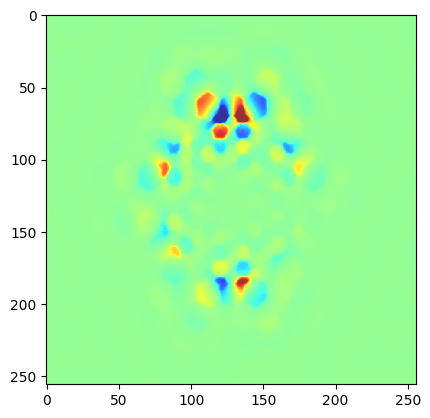

PyObject <matplotlib.image.AxesImage object at 0x7f2f563bb9d0>

In [96]:
imshow(real.(hzs_new[1]*cis(-thetas[1])+hzs_new[2]*cis(thetas[1]-thetas[2])+hzs_new[3]*cis(thetas[1]-thetas[3])), cmap="jet", alpha=0.8, vmin=-1, vmax=1)


In [39]:
wyckoffs(13, 2)

4-element Vector{WyckoffPosition{2}}:
 3d: [α, β]
 1c: [2/3, 1/3]
 1b: [1/3, 2/3]
 1a: [0, 0]

In [43]:
hz = h5open("./corner_charge_supercells/dim2-sg16-28080-res16-te-corner-h.k01.b317.z.te.h5") do fid
        read(fid, "z.r-new")
    end;

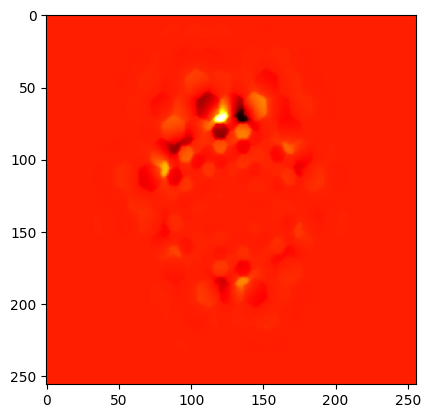

PyObject <matplotlib.image.AxesImage object at 0x7f2216ead520>

In [44]:
imshow(hz, cmap="hot")

In [34]:
plt.get_cmap("gray", 10)

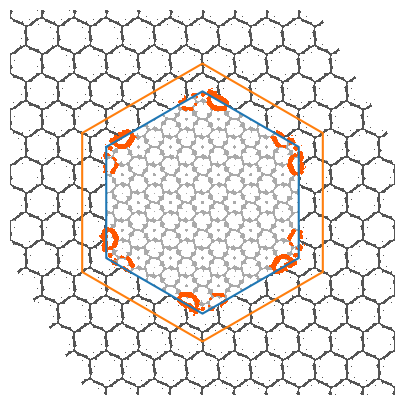

In [60]:
supercell = 6

fig_dir = "./Fig3_Supercell_Figs/"

sg = 16; mode="te"
id = 8080
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
Rs, flat_bulk, isoval_bulk, _ = lattice_from_mpbparams(calcname)
sg = 16; mode="te"
id = 275
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
_, flat_clad, isoval_clad, _ = lattice_from_mpbparams(calcname)

xyz = range(-8, 8, length=256)
X = broadcast((x,y) -> (x)*Rs[1][1] + (y)*Rs[2][1], reshape(xyz,(1,256)), reshape(xyz, (256,1)))
Y = broadcast((x,y) -> (x)*Rs[1][2] + (y)*Rs[2][2], reshape(xyz,(1,256)), reshape(xyz, (256,1)));

fig = figure(figsize=(5, 5))

contour_data = sum(pwrs)
max_data = maximum(contour_data)
wigner_cell = wignerseitz(Rs)
supercell_plot(flat_bulk, flat_clad, Rs, wigner_cell, isoval_bulk, isoval_clad, fig=fig, ax=gca(), 
    xyz=range(-7, 7, length=3000), supercell=supercell, plot_boundary=true)
contourf(X, Y, contour_data, alpha=1, levels=(max_data/5, max_data), cmap=plt.get_cmap("hot", 100))
gca().set_aspect("equal", adjustable="box")
xlim(-6, 6)
ylim(-6, 6)

# Plot bigger boundary 

c = Brillouin.cartesianize(wigner_cell)
cxs, cys = getindex.(c[1]*(supercell+1.5), 1), getindex.(c[1]*(supercell+1.5), 2)

push!(cxs, cxs[1]); push!(cys, cys[1])

gca().plot(cxs, cys)  # plot unit cell

#savefig(fig_dir*"Figure3-sg16-corner.pdf")


In [56]:
include("plotting_supercells.jl")

plotiso_supercell (generic function with 5 methods)

In [42]:
plt.get_cmap("gray", 10)

In [295]:
# Next we analyze sg13- c3 symmetry 

In [16]:
sg = 13; id_eps=3; mode="te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [17]:
clad_dispersion = dispersionsv[9000]
bulk_dispersion = dispersionsv[3510];
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg13/eps3/te/dim2-sg13-23510-res64-te-dispersion.out", ',')[:, 2:4])]
gamma_idx = findall(x -> isapprox(x, [0.3333, 0.333, 0], atol=1e-3), kpoints)

1-element Vector{Int64}:
 17

In [23]:
brs = bandreps(13, 2)
n_clad = cumsummariesv[9000][3].n
n_bulk = cumsummariesv[3510][3].n
decompose(n_bulk, brs)
decompose(n_clad, brs);

In [69]:
bands_c3 = readdlm("./corner_charge_supercells/output/dim2-sg13-23510-res64-te-supercell-corner-dispersion-1.out", ',')[:, 6:end]

1×720 Matrix{Float64}:
 0.0  0.0482109  0.0482339  0.0484295  …  0.759571  0.759629  0.760088

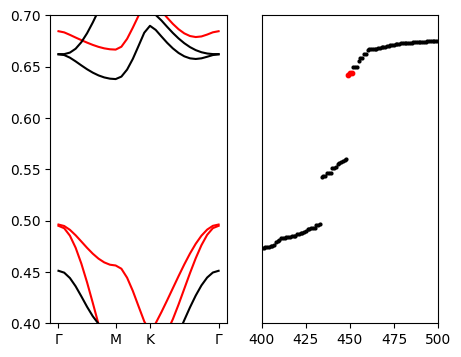

(Any[], Any[])

In [72]:
figure(figsize=(5, 4))
subplot(1, 2, 1)
plot(clad_dispersion, color="red")
plot(bulk_dispersion, color="black")
ylim(0.4, 0.7)
xticks([0, 10, 16, 28], ["Γ", "M", "K", "Γ"])
subplot(1, 2, 2)
scatter(1:720, bands_c3[1, :], s=4, color="black")
scatter(449:451, bands_c3[1, 449:451], s=10, color="red")

ylim(0.4, 0.7)
xlim(400, 500)
yticks([])

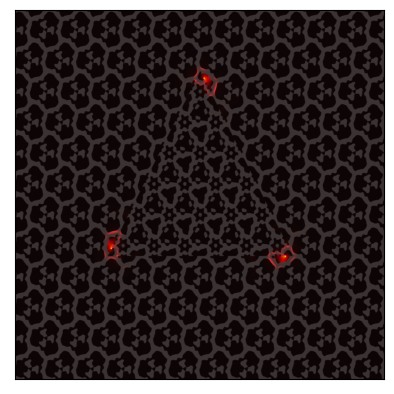

(Any[], Any[])

In [61]:
lattice_vectors = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-epsilon.h5", "r") do fid
    read(fid, "lattice vectors")
end
epsilon = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-epsilon.h5", "r") do fid
    read(fid, "data-new")
end

epsilon_new = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-epsilon.h5", "r") do fid
    read(fid, "data-new")
end

figure()
imshow(epsilon_new, alpha=0.9, cmap="gray")
pwrs = Matrix{Float64}[]
pwrs_new = Matrix{Float64}[]

for i in 449:451 
    pwr = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data")
    end
    pwr_new = h5open("./corner_charge_supercells/output/sg13/dim2-sg13-23510-res64-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
        read(fid, "data-new")
    end
    push!(pwrs, pwr)
    push!(pwrs_new, pwr_new)
end
imshow(sum(pwrs_new), cmap="hot", alpha=0.8)
xticks([])
yticks([])

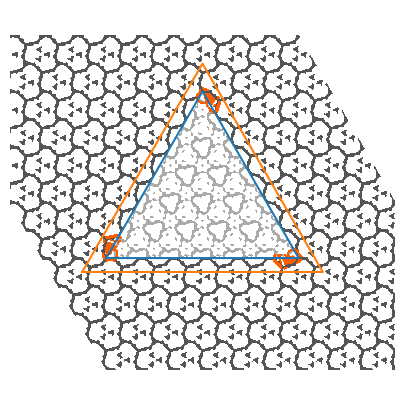

In [67]:
vert_idxs = collect(2:2:6)
supercell = 6
fig_dir = "./Fig3_Supercell_Figs/"


sg = 13; mode="te"
id = 3510
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
Rs, flat_bulk, isoval_bulk, _ = lattice_from_mpbparams(calcname)
sg = 13; mode="te"
id = 9000
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
_, flat_clad, isoval_clad, _ = lattice_from_mpbparams(calcname)

xyz = range(-6, 6, length=768)

Rsprime = [Rs[2], Rs[1]]
X = broadcast((x,y) -> (x)*Rsprime[1][1] + (y)*Rsprime[2][1], reshape(xyz,(1, 768)), reshape(xyz, (768,1)))
Y = broadcast((x,y) -> (x)*Rsprime[1][2] + (y)*Rsprime[2][2], reshape(xyz,(1, 768)), reshape(xyz, (768,1)));

fig = figure(figsize=(5, 5))

contour_data = sum(pwrs)
max_data = maximum(contour_data)
wigner_cell = wignerseitz(Rs)
supercell_plot(flat_bulk, flat_clad, Rs, wigner_cell, isoval_bulk, isoval_clad, fig=fig, ax=gca(), 
    xyz=range(-6, 6, length=3000), supercell=supercell, plot_boundary=true, vert_idxs=vert_idxs)
contourf(X, Y, contour_data, alpha=1, levels=(max_data/10, max_data), cmap=plt.get_cmap("hot", 100))
gca().set_aspect("equal", adjustable="box")
xlim(-6, 6)
ylim(-6, 6)

c = Brillouin.cartesianize(wigner_cell)
cxs, cys = getindex.(c[1][vert_idxs]*(supercell+1.5), 1), getindex.(c[1][vert_idxs]*(supercell+1.5), 2)

push!(cxs, cxs[1]); push!(cys, cys[1])

gca().plot(cxs, cys)  # plot unit cell

savefig(fig_dir*"Figure3-sg13-corner.pdf")


In [2]:
sg = 10; id_eps=3; mode="tm"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [4]:
brs = bandreps(10, 2)
n_bulk = cumsummariesv[3797][5].n
decompose(n_bulk, brs)

8-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0

In [12]:
bulk_dispersion = dispersionsv[3797];
bulk_summaries = cumsummariesv[3797];

In [14]:
corners(bulk_summaries[5])

0.5

In [171]:
kpoints = [collect(row) for row in eachrow(readdlm("./dispersions/output/sg10/eps3/tm/dim2-sg10-23510-res64-tm-dispersion.out", ',')[:, 2:4])];

In [193]:
bandsc4 = readdlm("./corner_charge_supercells/output/dim2-sg10-23797-res16-tm-supercell-corner-dispersion-1.out", ',')[:, 6:end];

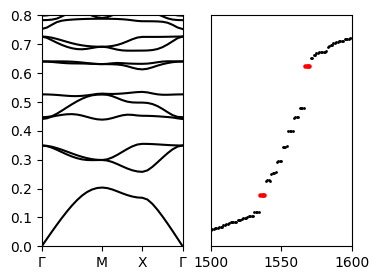

(Any[], Any[])

In [206]:
figure(figsize=(4, 3))
subplot(1, 2, 1)
plot(bulk_dispersion, color="black")
ylim(0, 0.8)
xticks([0, 12, 20, 28], ["Γ", "M", "X", "Γ"])
xlim(0, 28)
subplot(1, 2, 2)
scatter(1:2048, bandsc4, s=1, color="black")
scatter(1535:1538, bandsc4[1535:1538], s=5, color="red")
scatter(1567:1570, bandsc4[1567:1570], s=5, color="red")
ylim(0.53, 0.63)
xlim(1500, 1600)
yticks([])


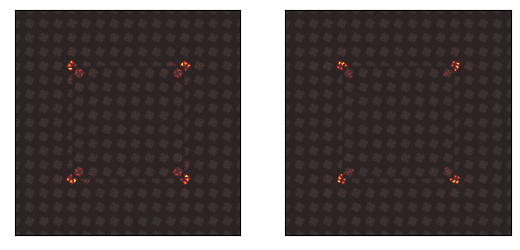

(Any[], Any[])

In [18]:
epsilon = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-epsilon.h5", "r") do fid
    read(fid, "data")
end
figure()
subplot(1, 2, 1)
imshow(epsilon, alpha=0.3, cmap="gray")

pwrs = Matrix{Float64}[]
for i in 1535:1538 #360:412
    pwr = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-dpwr.k01.b$i.tm.h5", "r") do fid
        read(fid, "data")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])
subplot(1, 2, 2)
imshow(epsilon, alpha=0.3, cmap="gray")

pwrs = Matrix{Float64}[]
for i in 1567:1570 #360:412
    pwr = h5open("./corner_charge_supercells/output/sg10/dim2-sg10-23797-res16-tm-corner-dpwr.k01.b$i.tm.h5", "r") do fid
        read(fid, "data")
    end
    push!(pwrs, pwr)
end
imshow(sum(pwrs), cmap="hot", alpha=0.8)
xticks([])
yticks([])



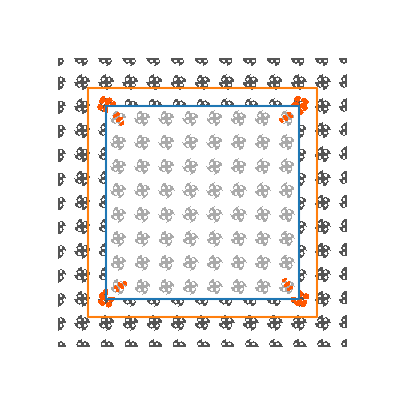

In [23]:
supercell = 8
fig_dir = "./Fig3_Supercell_Figs/"


sg = 10; mode="te"
id = 3797
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
Rs, flat_bulk, isoval_bulk, _ = lattice_from_mpbparams(calcname)
id = 3797
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
_, flat_clad, isoval_clad, _ = lattice_from_mpbparams(calcname)

xyz = range(-8, 8, length=256)

Rsprime = [Rs[2], Rs[1]]
X = broadcast((x,y) -> (x)*Rsprime[1][1] + (y)*Rsprime[2][1], reshape(xyz,(1, 256)), reshape(xyz, (256, 1)))
Y = broadcast((x,y) -> (x)*Rsprime[1][2] + (y)*Rsprime[2][2], reshape(xyz,(1, 256)), reshape(xyz, (256, 1)));

fig = figure(figsize=(5, 5))

contour_data = sum(pwrs)
max_data = maximum(contour_data)
wigner_cell = wignerseitz(Rs)

min_range = -6
max_range = 6
resolution = 3000
relative_shift = 1/2*resolution/(max_range-min_range)
relative_shift = Int(round(relative_shift))*[1, 1]


supercell_plot(flat_bulk, flat_clad, Rs, wigner_cell, isoval_bulk, isoval_clad, fig=fig, ax=gca(), 
    xyz=range(min_range, max_range, length=resolution), supercell=supercell, plot_boundary=true, relative_shift=relative_shift)
contourf(X, Y, contour_data, alpha=1, levels=(max_data/10, max_data), cmap=plt.get_cmap("hot", 100))
gca().set_aspect("equal", adjustable="box")

c = Brillouin.cartesianize(wigner_cell)
cxs, cys = getindex.(c[1]*(supercell+1.5), 1), getindex.(c[1]*(supercell+1.5), 2)

push!(cxs, cxs[1]); push!(cys, cys[1])

gca().plot(cxs, cys)  # plot unit cell

savefig(fig_dir*"Figure3-sg10-corner.pdf")


In [34]:
sg = 2; id_eps=3; mode="te"
dispersion_dir = "./dispersions/output/sg$sg/eps$(id_eps)/$mode/";
loaded_dispersion_data = load(dispersion_dir*"sg$sg-epsid$(id_eps)-res64-$mode.jld2")
marginsv = loaded_dispersion_data["marginsv"];
cumsummariesv = loaded_dispersion_data["cumsummariesv"];
dispersionsv = loaded_dispersion_data["dispersionsv"];

In [37]:
n_bulk = cumsummariesv[2527][1].n
brs = bandreps(2, 2)
decompose(n_bulk, brs)

8-element Vector{Float64}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

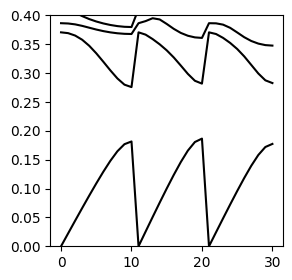

(0.0, 0.4)

In [396]:
figure(figsize=(3, 3))
plot(dispersionsv[2527], color="black")
ylim(0, 0.4)

In [8]:
epsilon = h5open("./corner_charge_supercells/output/sg2/dim2-sg2-22527-res16-te-corner-epsilon.h5", "r") do fid
    read(fid, "data")
end;
epsilon_new = h5open("./corner_charge_supercells/output/sg2/dim2-sg2-22527-res16-te-corner-epsilon.h5", "r") do fid
    read(fid, "data-new")
end;

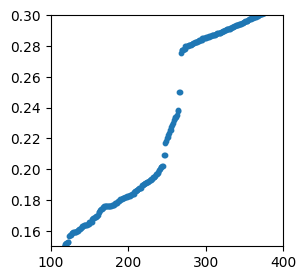

(100.0, 400.0)

In [9]:
figure(figsize=(3, 3))
scatter(1:512, readdlm("./corner_charge_supercells/output/dim2-sg2-22527-res16-te-supercell-corner-dispersion-1.out", ',')[1, 6:end], s=10)
ylim(0.15, 0.3)
xlim(100, 400)

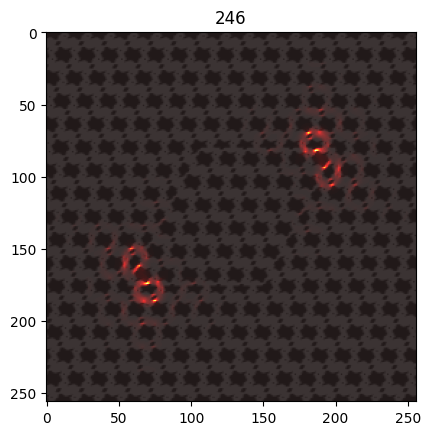

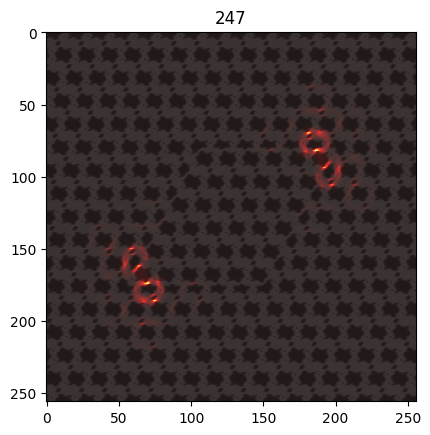

In [10]:
pwrs = Matrix{Float64}[]
pwrs_new = Matrix{Float64}[]
for i in 246:247
    figure()
    pwr = h5open("./corner_charge_supercells/output/sg2/dim2-sg2-22527-res16-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
    read(fid, "data")
    end
    pwr_new = h5open("./corner_charge_supercells/output/sg2/dim2-sg2-22527-res16-te-corner-dpwr.k01.b$i.te.h5", "r") do fid
    read(fid, "data-new")
    end
    push!(pwrs_new, pwr_new)
    push!(pwrs, pwr)
    imshow(epsilon_new, alpha=0.5, cmap="gray")
    imshow(pwr_new, alpha=0.8, cmap="hot")
title("$i")
end


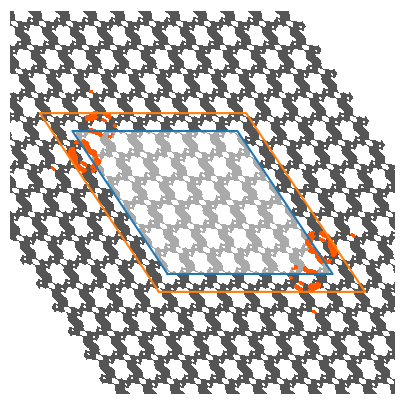

In [16]:
supercell = 6

fig_dir = "./Fig3_Supercell_Figs/"

vert_idxs = [5, 6, 1, 2]
sg = 2; mode="te"
id = 22527
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
Rs, flat_bulk, isoval_bulk, _ = lattice_from_mpbparams(calcname)
sg = 2; mode="te"
id = 22527
calcname = "./symeigs/input/dim2-sg$(sg)-$id-res64-$(mode).sh"
_, flat_clad, isoval_clad, _ = lattice_from_mpbparams(calcname)

xyz = range(-8, 8, length=256)

Rsprime = [Rs[2], Rs[1]]
X = broadcast((x,y) -> (x)*Rsprime[1][1] + (y)*Rsprime[2][1], reshape(xyz,(1, 256)), reshape(xyz, (256,1)))
Y = broadcast((x,y) -> (x)*Rsprime[1][2] + (y)*Rsprime[2][2], reshape(xyz,(1, 256)), reshape(xyz, (256,1)));

fig = figure(figsize=(5, 5))

contour_data = sum(pwrs)
max_data = maximum(contour_data)
wigner_cell = wignerseitz(Rs)
new_cell = Cell([SVector{2}([-0.5, -0.5]), SVector{2}([0.5, -0.5]), SVector{2}([0.5, 0.5]), SVector{2}([-0.5, 0.5]), SVector{2}([1., 0.]), SVector{2}([1., 0.])], wigner_cell.faces, wigner_cell.basis, wigner_cell.setting)

min_range = -8
max_range = 8
resolution = 3000
relative_shift = 1/2*resolution/(max_range-min_range)
relative_shift = Int(round(relative_shift))*[1, 1]
supercell_plot(flat_bulk, flat_clad, Rs, new_cell, isoval_bulk, isoval_clad, fig=fig, ax=gca(), 
    xyz=range(min_range, max_range, length=resolution), supercell=supercell, plot_boundary=true, relative_shift=relative_shift, vert_idxs=vert_idxs)
contourf(X, Y, contour_data, alpha=1, levels=(max_data/10, max_data), cmap=plt.get_cmap("hot", 100))

gca().set_aspect("equal", adjustable="box")
xlim(-7, 7)
ylim(-7, 7)

c = Brillouin.cartesianize(new_cell)
cxs, cys = getindex.(c[1][vert_idxs]*(supercell+1.5), 1), getindex.(c[1][vert_idxs]*(supercell+1.5), 2)

push!(cxs, cxs[1]); push!(cys, cys[1])

gca().plot(cxs, cys)  # plot unit cell

savefig(fig_dir*"Figure3-sg2-corner.pdf")


In [3]:
# To determine the average number of bands
for sg in [2, 6, 9:17...]
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_num_bands"]
    num_band_data = sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])[1:3]
    data = num_band_data[1]
    band_length_data = collect(1:40)
    first_non_zero_bandnum = findfirst(x-> !iszero(x), data)
    min_num_bands =  isnothing(first_non_zero_bandnum) ? NaN : band_length_data[first_non_zero_bandnum]
    mean_num_bands = dot(data, band_length_data)/sum(data)
    std_num_bands = sqrt((1/sum(data))*dot(data, (band_length_data .- mean_num_bands).^2))
    println("min: $min_num_bands mean: $mean_num_bands, std: $std_num_bands")
end

min: NaN mean: NaN, std: NaN
min: 3 mean: 7.934720908230842, std: 6.560431238469813
min: 3 mean: 5.140480591497227, std: 2.6000581093485775
min: 3 mean: 3.0, std: 0.0
min: 3 mean: 5.2421328671328675, std: 3.733931681288256
min: 4 mean: 5.429864253393665, std: 4.015897647877052
min: 2 mean: 2.0, std: 0.0
min: 2 mean: 2.0, std: 0.0
min: 2 mean: 4.038692461641094, std: 2.671690322174636
min: 2 mean: 2.46999276934201, std: 0.6687447906569965
min: 2 mean: 3.834592445328032, std: 2.8699575337328604


In [2]:
# Let's see what elementary band representations give us corner charge

In [21]:
sg = 15
loaded_data = load("./symeigs/sg$sg-ebr-data.jld2")
brs = bandreps(sg, 2)
wps = sg_wyckoffs_dict[sg];

In [64]:
loaded_data["unique_ebrs_dict"][(15, 3, "te")][1][[4, 6, 8, 10, 12, 15]]

6-element Vector{Vector{Integer}}:
 [1, 0, 0, 1, 0]
 [1, 0, 0, 3, 2]
 [2, 1, 0, 4, 3]
 [1, 0, 0, 2, 1]
 [2, 1, 0, 2, 1]
 [4, 3, 0, 4, 3]

In [60]:
sum(loaded_data["ebr_frequency_dict"][15, 3, "te"][1][[4, 6, 8, 10, 12, 15]])

317

In [55]:
for (idx, ebr_decomp) in enumerate(loaded_data["unique_ebrs_dict"][(15, 3, "te")][1])
    n = Int.(hcat(brs.bandreps...)*ebr_decomp)
    p = polarization_sg15(n, brs.irlabs, wps[3])
    q = corner_sg15(n, brs.irlabs, wps[3])
    (q != 0 && p == zeros(2)) &&  println(idx)
end

4
6
8
10
12
15


In [3]:
sg = 2
loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]


Dict{Tuple{Integer, Integer, String, WyckoffPosition{2}}, Vector{Vector{Integer}}} with 40 entries:
  (2, 2, "te", 1c: [1/2, 0])   => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 3, "te", 1c: [1/2, 0])   => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 5, "te", 1b: [0, 1/2])   => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 4, "te", 1c: [1/2, 0])   => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 2, "te", 1d: [1/2, 1/2]) => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 5, "tm", 1b: [0, 1/2])   => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 5, "tm", 1a: [0, 0])     => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 1, "tm", 1d: [1/2, 1/2]) => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 1, "te", 1a: [0, 0])     => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 3, "te", 1d: [1/2, 1/2]) => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 4, "te", 1d: [1/2, 1/2]) => [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0,…
  (2, 1, 

In [4]:
c2_te_data = Float64[]
c2_tm_data = Float64[]

for sg in [2, 6, 9] #p2, p2mm, c2mm
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    push!(c2_te_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c2_tm_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c4_te_data = Float64[]
c4_tm_data = Float64[]

for sg in [10, 11, 12] # p4, p4mm, p4gm
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    push!(c4_tm_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c4_te_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c3_te_data = Float64[]
c3_tm_data = Float64[]

for sg in [13, 14, 15] # p3, p3m1, p31m
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    push!(c3_tm_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c3_te_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c6_tm_data = Float64[]
c6_te_data = Float64[]

for sg in [16, 17] # p6, p6mm
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charge_vals"]
    push!(c6_tm_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c6_te_data, [sum(x) for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

# Fig 3 (a) Bar graph heights for posterity 

In [24]:
fig3_te_data = [c2_te_data..., c4_te_data..., c3_te_data..., c6_te_data...] ./100;
fig3_tm_data = [c2_tm_data..., c4_tm_data..., c3_tm_data..., c6_tm_data...] ./100;
fig3_data_concat = Dict("te" => fig3_te_data, "tm" => fig3_tm_data)
max_height = 50.2024
max_percentages = Dict(2=>6, 6=>6, 9=>6, 10=>25, 11=>25, 12=>25, 13=>40, 14=>40, 15=>40, 16=>80, 17=>80) 

for mode in ["te", "tm"]
    println("Mode: $mode")
    data = fig3_data_concat[mode]
    sgs = [2, 6, 9:17...]
    for (sg_idx, sg) in enumerate(sgs)
        max_percentage = max_percentages[sg]
        offset = 3*(sg_idx - 1)
        for multiplet_idx in 1:3
            bar_percentage = data[offset + multiplet_idx]
            bar_height = max_height*(bar_percentage/max_percentage)
            println("sg: $sg, multiplet: $multiplet_idx, Bar height: $(round(bar_height, digits=4)) pts")

        end
        println("\n")
    end
    println("\n\n")
end

Mode: te
sg: 2, multiplet: 1, Bar height: 0.0 pts
sg: 2, multiplet: 2, Bar height: 0.0 pts
sg: 2, multiplet: 3, Bar height: 8.0115 pts


sg: 6, multiplet: 1, Bar height: 22.11 pts
sg: 6, multiplet: 2, Bar height: 36.1457 pts
sg: 6, multiplet: 3, Bar height: 49.1356 pts


sg: 9, multiplet: 1, Bar height: 11.3165 pts
sg: 9, multiplet: 2, Bar height: 32.4642 pts
sg: 9, multiplet: 3, Bar height: 37.1916 pts


sg: 10, multiplet: 1, Bar height: 0.0201 pts
sg: 10, multiplet: 2, Bar height: 16.9785 pts
sg: 10, multiplet: 3, Bar height: 9.91 pts


sg: 11, multiplet: 1, Bar height: 11.4863 pts
sg: 11, multiplet: 2, Bar height: 33.5653 pts
sg: 11, multiplet: 3, Bar height: 41.5475 pts


sg: 12, multiplet: 1, Bar height: 8.8758 pts
sg: 12, multiplet: 2, Bar height: 30.2018 pts
sg: 12, multiplet: 3, Bar height: 27.2298 pts


sg: 13, multiplet: 1, Bar height: 0.502 pts
sg: 13, multiplet: 2, Bar height: 34.7275 pts
sg: 13, multiplet: 3, Bar height: 12.0318 pts


sg: 14, multiplet: 1, Bar height: 0.47

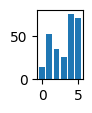

In [70]:
cm = 1/2.54
figure(figsize=(1.5*cm, 2.3*cm))
bar(0:5, c6_te_data ./ 100)
ylim(0, 80)
savefig("c6_te_data.pdf")

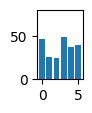

In [72]:
cm = 1/2.54
figure(figsize=(1.5*cm, 2.3*cm))
bar(0:5, c6_tm_data ./ 100)
ylim(0, 80)
savefig("c6_tm_data.pdf")

# Sanity Check

In [38]:
c2_te_data_check = Float64[]
c2_tm_data_check = Float64[]

for sg in [2, 6, 9]
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charges"]
    push!(c2_te_data_check , [x for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c2_tm_data_check , [x for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c4_te_data_check  = Float64[]
c4_tm_data_check  = Float64[]

for sg in [10, 11, 12]
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charges"]
    push!(c4_tm_data_check , [x for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c4_te_data_check , [x for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c3_te_data_check  = Float64[]
c3_tm_data_check  = Float64[]

for sg in [13, 14, 15]
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charges"]
    push!(c3_tm_data_check , [x for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c3_te_data_check , [x for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

c6_tm_data_check  = Float64[]
c6_te_data_check  = Float64[]

for sg in [16, 17]
    loaded_data = load("./symeigs/sg$sg-corner-data.jld2")["cum_corner_charges"]
    push!(c6_tm_data_check , [x for x in (sum([loaded_data[(sg, 3, "tm", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
    push!(c6_te_data_check , [x for x in (sum([loaded_data[(sg, 3, "te", wp)] for wp in sg_wyckoffs_dict[sg]])/length(sg_wyckoffs_dict[sg]))[1:3]]...) 
end

In [48]:
@assert c6_te_data_check == c6_te_data
@assert c6_tm_data_check == c6_tm_data

@assert c4_te_data_check == c4_te_data
@assert c4_tm_data_check == c4_tm_data

@assert c3_te_data_check ≈ c3_te_data
@assert c3_tm_data_check == c3_tm_data

@assert c2_te_data_check == c2_te_data
@assert c2_tm_data_check == c2_tm_data